# Import dependencies for preprocessing the data

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load & Preprocess the data

In [2]:
# Load the data from file

dataset = pd.read_csv("../preprocessing_stuff/PCA/data/irises/IRIS.csv")
x_data = dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

In [3]:
print(f"x_data MEAN:\n{x_data.mean()}\n")
print(f"x_data STD:\n{x_data.std()}")

x_data MEAN:
sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

x_data STD:
sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64


In [4]:
# Normalize the data

x_data -= x_data.mean(axis=0)
x_data /= x_data.std(axis=0)

In [5]:
print(f"x_data MEAN:\n{x_data.mean()}\n")
print(f"x_data STD:\n{x_data.std()}")

x_data MEAN:
sepal_length   -5.210647e-16
sepal_width    -6.631732e-16
petal_length    1.894781e-16
petal_width    -1.894781e-16
dtype: float64

x_data STD:
sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64


In [6]:
# Onehot encode labels

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

labels = dataset["species"]
coded_labels = label_encoder.fit_transform(labels)
y_data = onehot_encoder.fit_transform(coded_labels.reshape(-1, 1))

print(y_data)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [1]:
a = .1
b = 1.

In [7]:
x_data = x_data.to_numpy()

In [8]:
# Shuffle the data

perm = np.random.permutation(len(x_data))
x_data = x_data[perm]
y_data = y_data[perm]

In [9]:
# Train / Test split the data

train_count = int(len(x_data) * 0.8)

x_train = x_data[:train_count]
y_train = y_data[:train_count]

x_test = x_data[train_count:]
y_test = y_data[train_count:]

In [10]:
print(x_train[0])
print(y_train[0])

[-0.17309407  1.72050228 -1.16676652 -1.17755883]
[1. 0. 0.]


# Import dependencies for building NN

In [11]:
from keras.models import Sequential
from keras.layers import Dense

# Build the NN model

In [12]:
model = Sequential()

model.add(Dense(units=6, activation='relu', input_shape=(4,)))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=3, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train, y_train,
                    epochs=300,
                    validation_split=0.1)

Epoch 1/300
4/4 [==============================] - 2s 56ms/step - loss: 1.0662 - accuracy: 0.4259 - val_loss: 1.0811 - val_accuracy: 0.3333
Epoch 2/300
4/4 [==============================] - 0s 18ms/step - loss: 1.0456 - accuracy: 0.3889 - val_loss: 1.0706 - val_accuracy: 0.3333
Epoch 3/300
4/4 [==============================] - 0s 20ms/step - loss: 1.0306 - accuracy: 0.4352 - val_loss: 1.0607 - val_accuracy: 0.3333
Epoch 4/300
4/4 [==============================] - 0s 18ms/step - loss: 1.0162 - accuracy: 0.4444 - val_loss: 1.0490 - val_accuracy: 0.4167
Epoch 5/300
4/4 [==============================] - 0s 20ms/step - loss: 1.0031 - accuracy: 0.4537 - val_loss: 1.0371 - val_accuracy: 0.4167
Epoch 6/300
4/4 [==============================] - 0s 20ms/step - loss: 0.9906 - accuracy: 0.4630 - val_loss: 1.0260 - val_accuracy: 0.4167
Epoch 7/300
4/4 [==============================] - 0s 20ms/step - loss: 0.9786 - accuracy: 0.4907 - val_loss: 1.0150 - val_accuracy: 0.5000
Epoch 8/300
4/4 [===

# Show results of training

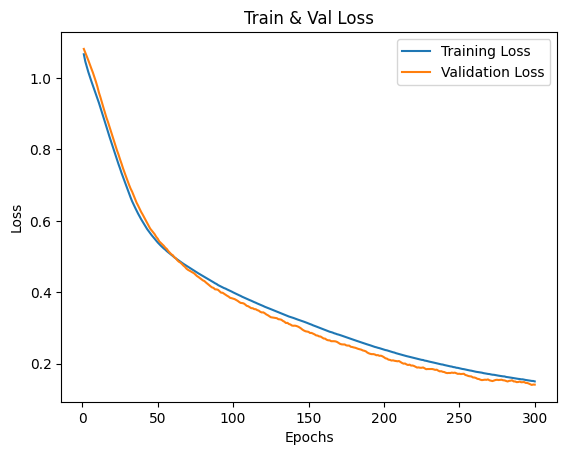

In [14]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Train & Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

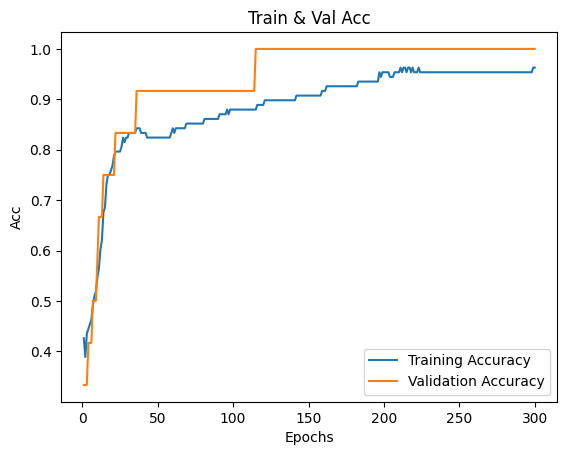

In [15]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.title("Train & Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [16]:
results = model.evaluate(x_test, y_test)
print(results)

1/1 [==============================] - 0s 37ms/step - loss: 0.1912 - accuracy: 0.9333
[0.19119104743003845, 0.9333333373069763]
